In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [637]:
df=pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\Datasets\Bengaluru_data\Bengaluru_House_Data.csv")

In [638]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [640]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [641]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [642]:
df.drop(["area_type","availability","society","balcony"],inplace=True,axis=1)

In [643]:
df.dropna(axis=0,inplace=True)

In [644]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [645]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [646]:
df.corr()

,bath,price
bath,1.00000,0.45635
price,0.45635,1.00000


#filling Missing Values

In [647]:
df["location"]=df["location"].fillna(df["location"].mode()[0])
df["size"]=df["size"].fillna(df["size"].mode()[0])

In [648]:
df["bath"]=df["bath"].fillna(df["bath"].mean())

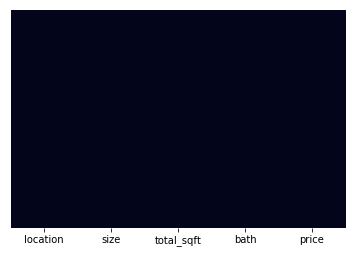

In [649]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [650]:
df["bhk"]=df["size"].apply(lambda x:int(x.split(' ')[0]))

In [651]:
df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [652]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [653]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [654]:
df[~df['total_sqft'].apply(is_float)].head(30)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [655]:
def sqrt_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [656]:
df['total_sqft']=df['total_sqft'].apply(sqrt_to_num)

In [657]:
df['total_sqft'].value_counts()

1200.00    843
1100.00    221
1500.00    204
2400.00    195
600.00     180
1000.00    173
1350.00    132
1050.00    123
1300.00    117
1250.00    114
900.00     112
1400.00    108
1800.00    104
1150.00    101
1600.00    100
1140.00     91
2000.00     82
1450.00     71
1650.00     69
800.00      68
1075.00     66
3000.00     66
1020.00     63
2500.00     63
1125.00     60
1550.00     60
1160.00     60
1700.00     59
950.00      59
1260.00     58
          ... 
2005.00      1
3366.00      1
552.00       1
842.00       1
612.50       1
2087.00      1
1483.00      1
3125.00      1
1793.00      1
1626.60      1
3270.00      1
1473.00      1
3628.00      1
1073.50      1
2270.00      1
2826.00      1
1217.00      1
1142.50      1
1642.00      1
555.00       1
2293.00      1
2185.00      1
499.00       1
7400.00      1
2120.00      1
892.00       1
1609.00      1
1542.14      1
4046.00      1
1915.00      1
Name: total_sqft, Length: 1972, dtype: int64

In [658]:
df['price_per_sqrt']=df['price']*100000/df['total_sqft']

In [659]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [660]:
df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [661]:
df['location']=df['location'].apply(lambda x: x.strip())

In [662]:
location_stat=df['location'].value_counts(ascending=False)


In [663]:
df['location'].replace(to_replace ="nan",value ="Whitefield")

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
5                      Whitefield
6                Old Airport Road
7                    Rajaji Nagar
8                    Marathahalli
9                    Gandhi Bazar
10                     Whitefield
11                     Whitefield
12             7th Phase JP Nagar
13                      Gottigere
14                       Sarjapur
15                    Mysore Road
16                  Bisuvanahalli
17          Raja Rajeshwari Nagar
18          Ramakrishnappa Layout
19             Manayata Tech Park
20                        Kengeri
21                     Binny Pete
22                    Thanisandra
23                      Bellandur
24                    Thanisandra
25                Mangammanapalya
26                Electronic City
27                     Whitefield
28               Ramagondanahalli
29            

In [664]:
df['location'].value_counts().sum()

13246

In [665]:
df.drop("size",axis=1,inplace=True)

In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
location          13246 non-null object
total_sqft        13200 non-null float64
bath              13246 non-null float64
price             13246 non-null float64
bhk               13246 non-null int64
price_per_sqrt    13200 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 724.4+ KB


In [668]:
len(location_stat)

1293

In [669]:
len(location_stat[location_stat>10])


241

In [670]:
len(location_stat[location_stat<=10])

1052

In [671]:
location_stats_less_than_10 = location_stat[location_stat<=10]
location_stats_less_than_10

Basapura                                10
Nagadevanahalli                         10
Kalkere                                 10
Sadashiva Nagar                         10
Nagappa Reddy Layout                    10
Dodsworth Layout                        10
Ganga Nagar                             10
Gunjur Palya                            10
1st Block Koramangala                   10
Naganathapura                           10
BTM 1st Stage                           10
Dairy Circle                            10
Sector 1 HSR Layout                     10
KUDLU MAIN ROAD                          9
2nd Phase JP Nagar                       9
4th Block Koramangala                    9
B Narayanapura                           9
Yemlur                                   9
Mathikere                                9
Ejipura                                  9
Volagerekallahalli                       9
Vignana Nagar                            9
Vishwanatha Nagenahalli                  9
Richmond To

In [672]:
df['location']=df['location'].apply(lambda x: "other" if x in location_stats_less_than_10 else x)

In [673]:
len(df['location'].unique())

242

In [674]:
df.shape

(13246, 6)

In [675]:
df2=df[~(df.total_sqft/df.bhk<300)]

In [676]:
df2.shape

(12502, 6)

In [677]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        st = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt>(m-st)) & (subdf.price_per_sqrt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df3 = remove_pps_outliers(df2)

In [678]:
df3.shape

(10241, 6)

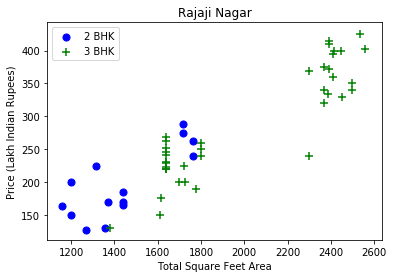

In [679]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
  
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Rajaji Nagar")

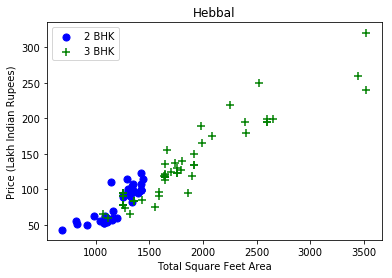

In [680]:
plot_scatter_chart(df3,"Hebbal")

In [681]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrt),
                'std': np.std(bhk_df.price_per_sqrt),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
# df8 = df7.copy()
df4.shape

(7329, 6)

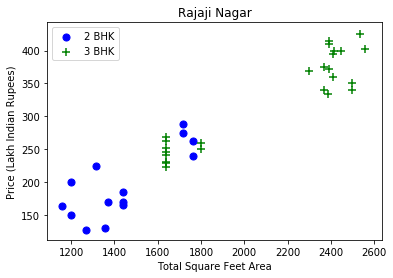

In [682]:
plot_scatter_chart(df4,"Rajaji Nagar")

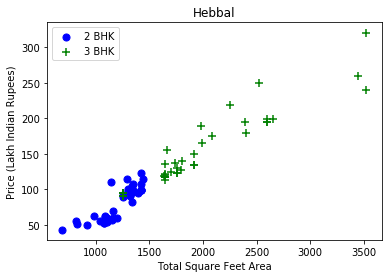

In [683]:
plot_scatter_chart(df4,"Hebbal")

In [684]:
df4["bath"].value_counts()

2.0     4198
3.0     1763
1.0      568
4.0      503
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
13.0       1
16.0       1
Name: bath, dtype: int64

In [685]:
#df4.head(10)
df4.shape

(7329, 6)

In [686]:
df4[df4.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqrt
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


In [687]:
len(df4.location.unique())

242

In [688]:
df5=df4[~(df4.bath>df4.bhk+2)]

In [689]:
df5.shape

(7325, 6)

In [690]:
df6=df5.drop("price_per_sqrt",axis=1)

In [691]:
df6.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


It is unusual to have 2 more bathrooms than number of bedrooms in a home

Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [692]:
df6[df6.bath>df6.bhk+2]

,location,total_sqft,bath,price,bhk


In [693]:
df6 = df6[df6.bath<df6.bhk+2]

In [694]:
df6.shape

(7251, 5)

In [695]:
df6.corr()*100

,total_sqft,bath,price,bhk
total_sqft,100.000000,69.391544,84.099670,67.021216
bath,69.391544,100.000000,60.130842,89.291043
price,84.099670,60.130842,100.000000,57.014453
bhk,67.021216,89.291043,57.014453,100.000000


In [696]:
column=df6['location']

In [697]:
columns=column.unique()

In [701]:
columns

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [699]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [700]:
df6['location']=label.fit_transform(df6['location'])

Build a Model

In [ ]:
X = df6.drop(['price'],axis='columns')
X.head(3)

In [ ]:
y=df6[["price"]]

In [ ]:
y.head(2)

In [ ]:
len(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)
predict1=lr_clf.predict(X_test)
print(r2_score(y_test,predict1))

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2  = RandomForestRegressor(n_estimators = 1000, random_state = 42)
model2.fit(X_train,y_train)
#model2.score(X_test,y_test)
predict2=model2.predict(X_test)
print(r2_score(y_test,predict2))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
des= DecisionTreeRegressor()
des.fit(X_train,y_train)
predict3=des.predict(X_test)
print(r2_score(y_test,predict3))

In [ ]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(X_train,y_train)
predict4=las.predict(X_test)
print(r2_score(y_test,predict4))

In [ ]:
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(X_train,y_train)
predict5=rid.predict(X_test)
print(r2_score(y_test,predict5))

In [ ]:
import pickle

In [ ]:
pickle_out=open("house_price.pkl","wb")
pickle.dump(model2, pickle_out)
pickle_out.close()

In [633]:
X.head()

,location,total_sqft,bath,bhk
0,0,2850.0,4.0,4
1,0,1630.0,3.0,3
2,0,1875.0,2.0,3
3,0,1200.0,2.0,3
4,0,1235.0,2.0,2


In [635]:
model = pickle.load(open("house_price.pkl",'rb'))
print(model.predict([[14,2850.5,5,5]])[0])

246.9685


In [577]:
df6['price']

0        428.00
1        194.00
2        235.00
3        130.00
4        148.00
5        413.00
6        368.00
8        167.00
9         85.00
10       210.00
12       225.00
13       100.00
14        93.00
15       180.00
16        50.00
17       131.00
18       210.00
19        88.50
20        86.00
21        85.00
22       175.00
24        85.00
26        75.00
27        50.75
28        40.25
29        47.25
30        47.25
31        41.00
32        69.00
33        47.25
          ...  
10176     20.00
10178     95.00
10181     22.50
10184     85.00
10185     73.00
10187     64.00
10188    120.00
10189     90.00
10190    285.00
10191    135.00
10193     58.00
10199     60.00
10200     94.28
10202    660.00
10206    230.00
10209    700.00
10211    183.00
10214     64.08
10217     90.00
10219     18.00
10221    140.00
10222     62.00
10224    140.00
10226    130.00
10230     64.00
10232     70.00
10233    200.00
10236    110.00
10237     26.00
10240    400.00
Name: price, Length: 732

In [596]:
columns

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [632]:
df6['bhk'].unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 11, 16, 10, 13], dtype=int64)

In [581]:
df6.shape

(7325, 5)